In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')



<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

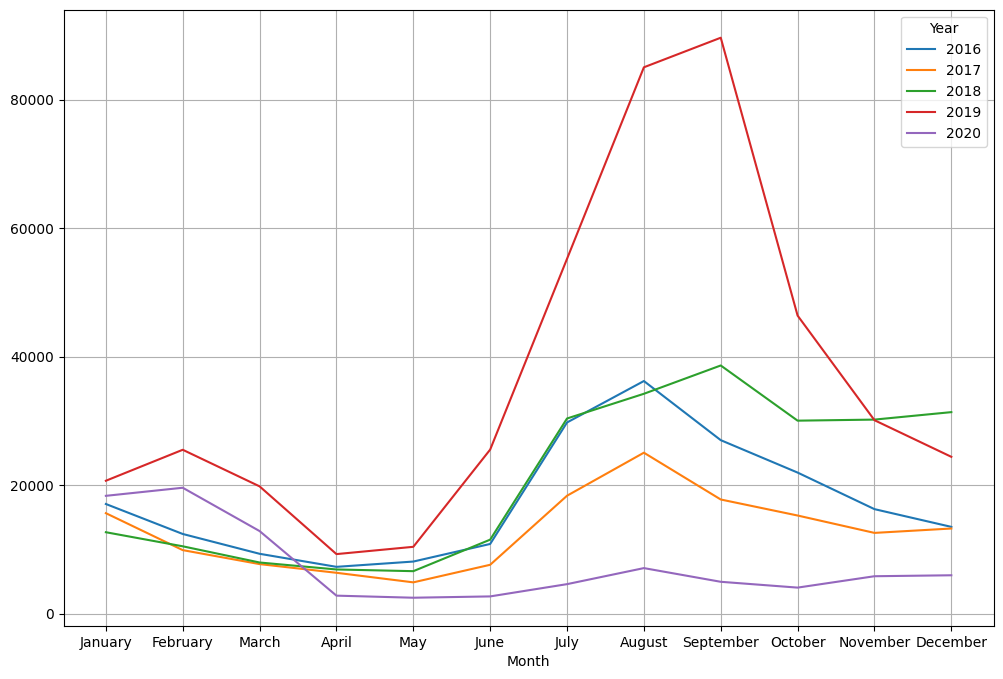

In [6]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


In [46]:
monthly_cases

Month      Year
January    2016    17052
           2017    15623
           2018    12657
           2019    20672
           2020    18324
February   2016    12386
           2017     9872
           2018    10466
           2019    25494
           2020    19583
March      2016     9300
           2017     7696
           2018     7944
           2019    19798
           2020    12838
April      2016     7269
           2017     6343
           2018     6860
           2019     9252
           2020     2784
May        2016     8092
           2017     4853
           2018     6594
           2019    10387
           2020     2461
June       2016    10831
           2017     7589
           2018    11502
           2019    25523
           2020     2665
July       2016    29744
           2017    18340
           2018    30363
           2019    55220
           2020     4575
August     2016    36195
           2017    25039
           2018    34210
           2019    85038
         

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

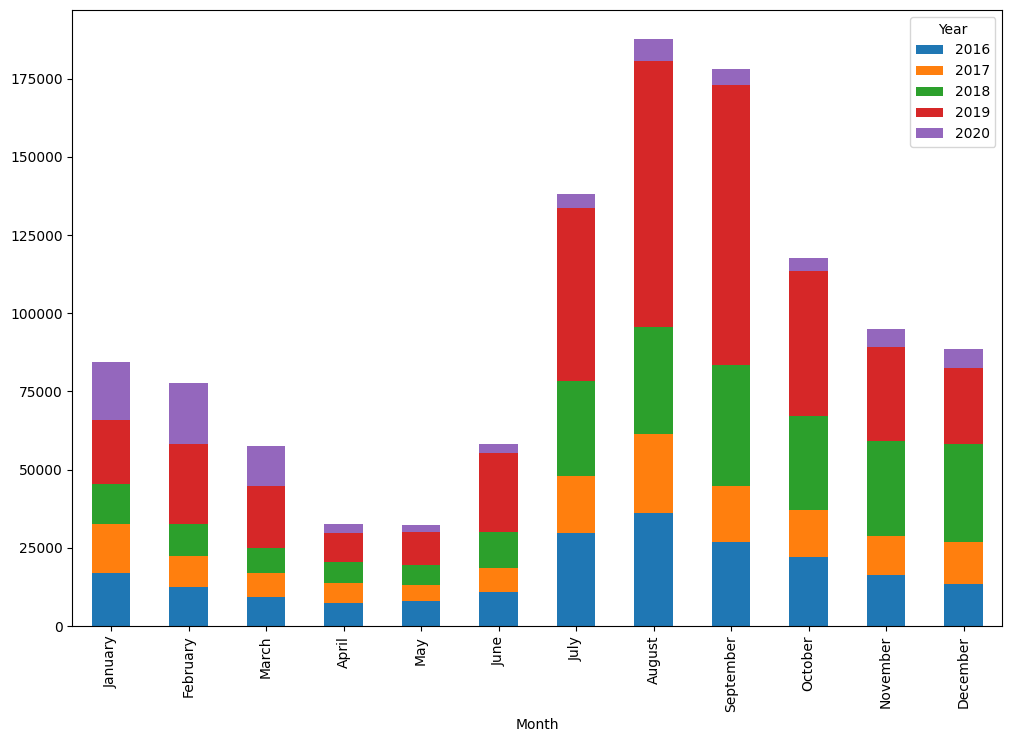

In [7]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

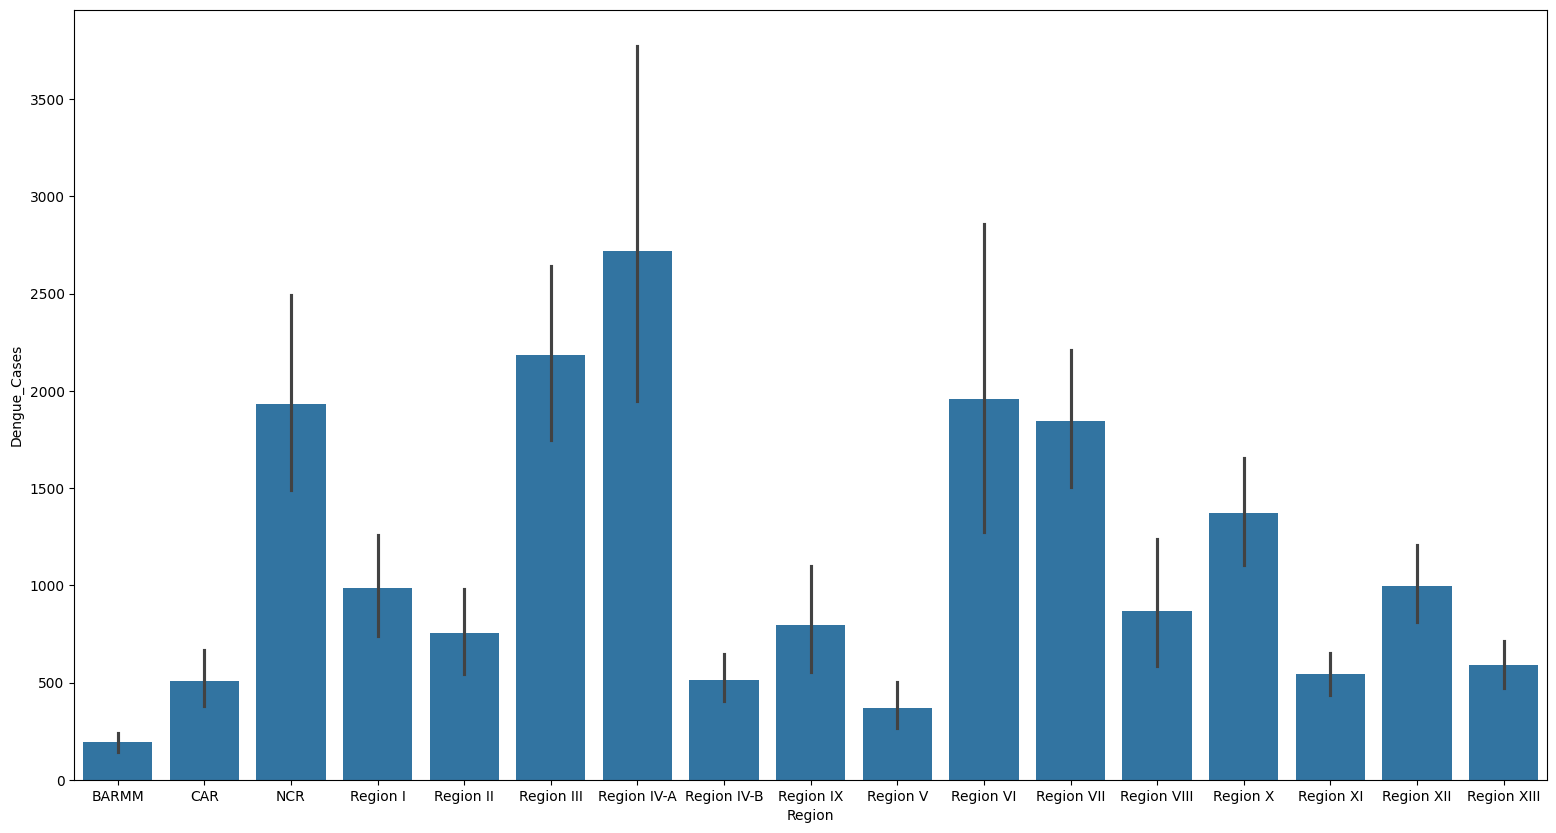

In [8]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

In [9]:
year2k16 = dengue[dengue["Year"] == 2016]

In [10]:
year2k16['Month'].value_counts()

Month
January      17
February     17
March        17
April        17
May          17
June         17
July         17
August       17
September    17
October      17
November     17
December     17
Name: count, dtype: int64

<h1>Year 2016</h1>

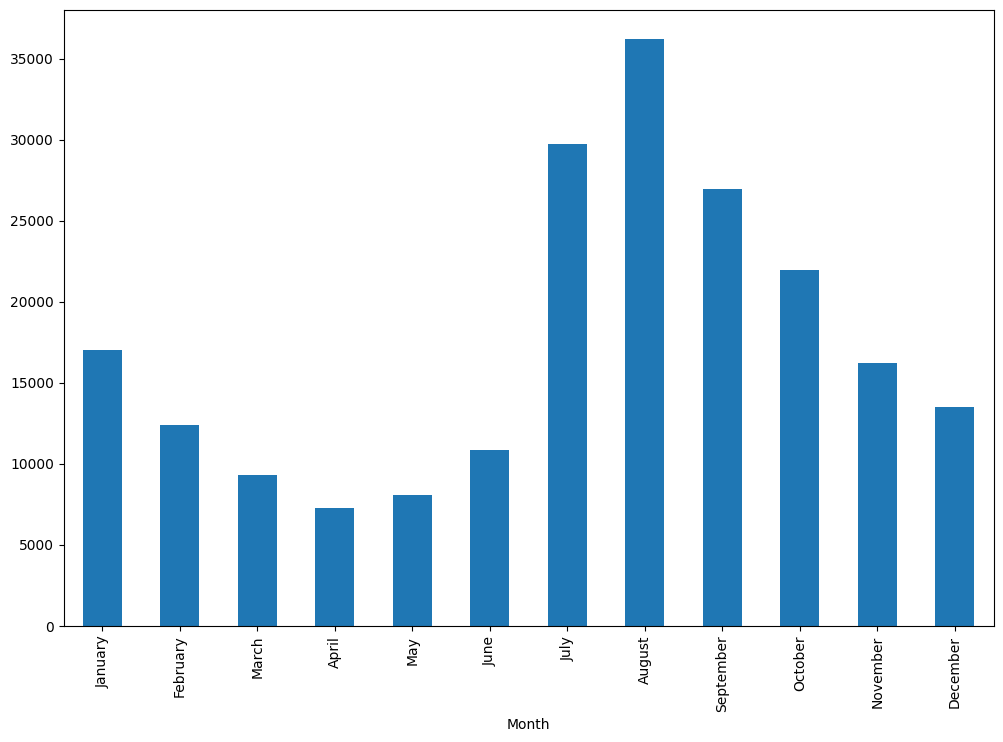

In [11]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k16['Month'] = pd.Categorical(year2k16['Month'], categories=month_order, ordered=True)

monthly_cases2k16 = year2k16.groupby([year2k16.Month])["Dengue_Cases"].sum()
monthly_cases2k16.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1>Insight #4</h1>
<h2>Dengue cases in 2016 peaked during July to September, which together accounted for approximately 36.7% of the total cases, with August alone making up about 13.2%. The lowest activity occurred from March to May, contributing just 10.2% combined. A clear rise began in June (3.9%) and tapered off after October, again showing a strong seasonal pattern tied to the monsoon. This underscores the importance of pre-monsoon preparedness in controlling dengue outbreaks.</h2>

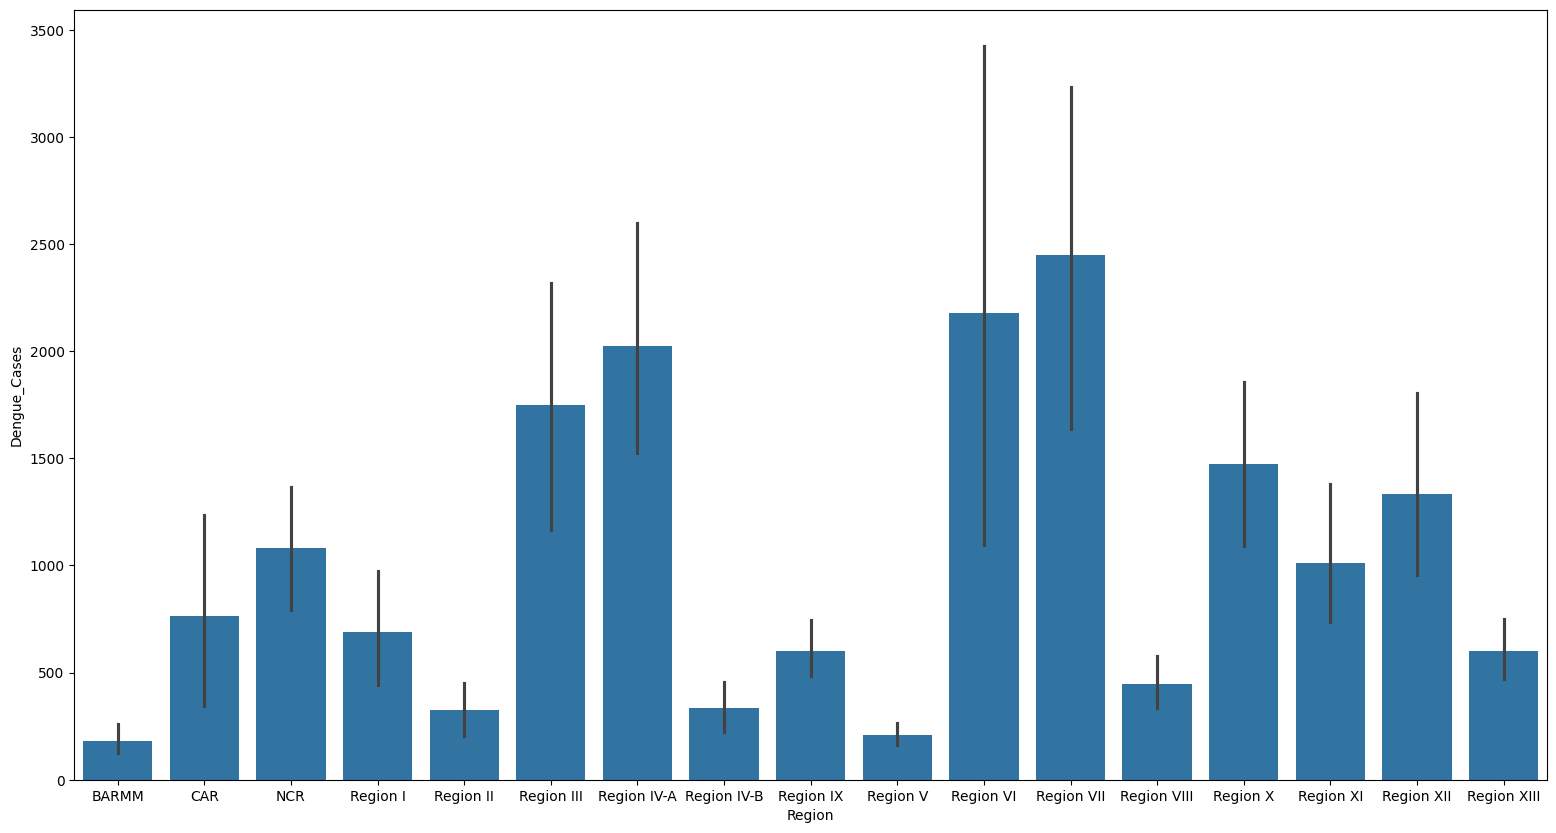

In [12]:
visual2 = sns.barplot(data=year2k16, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h1>Insight #5</h1>
<h2>In year 2016, the Region that has the highest peak of Dengue Cases was Region VII followed region VI</h2>

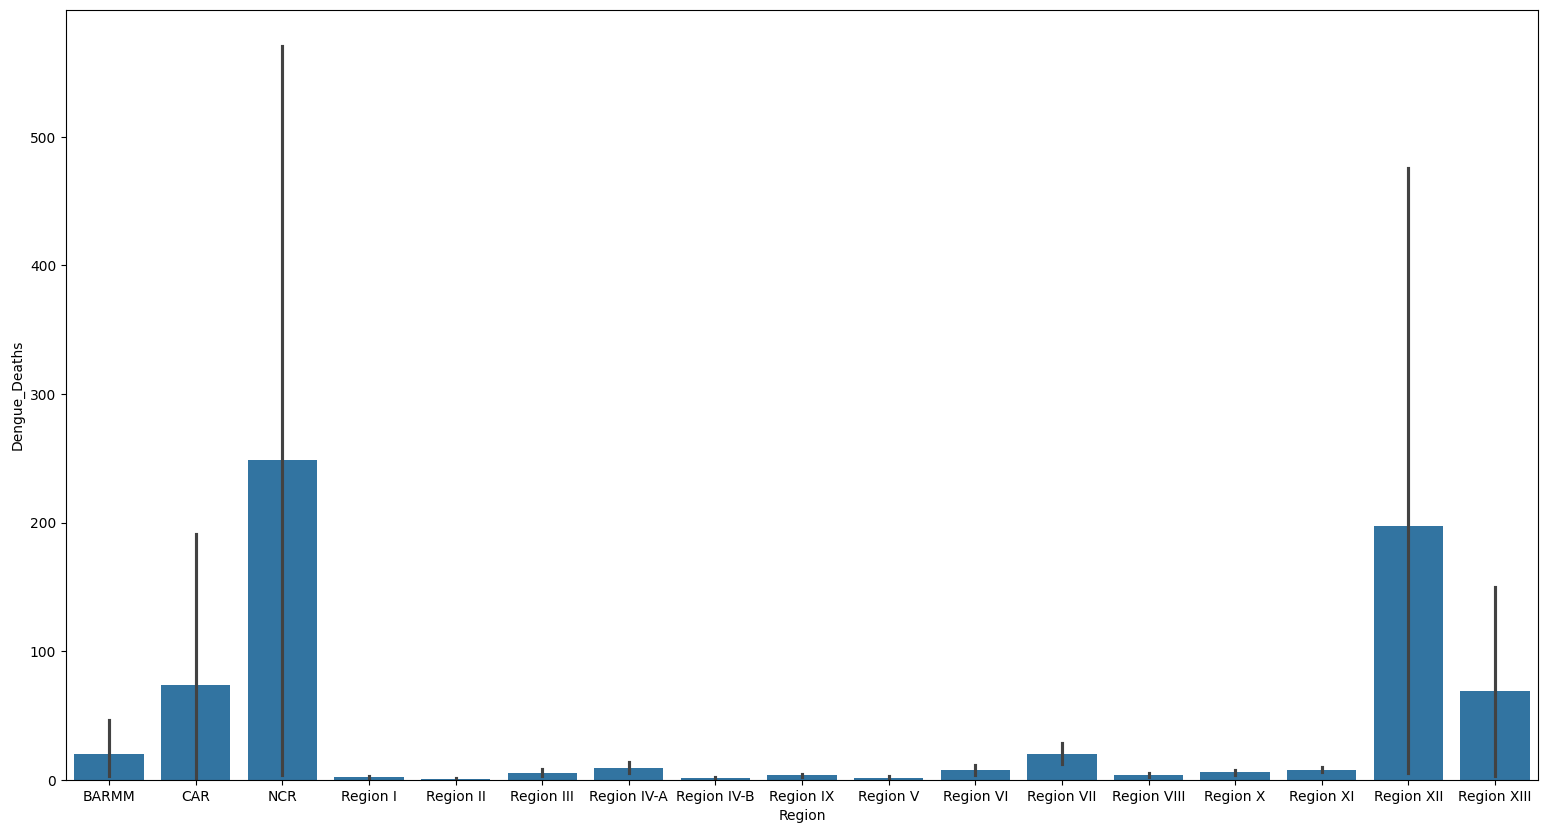

In [13]:
visual3 = sns.barplot(data=year2k16, x='Region', y="Dengue_Deaths")
plt.gcf().set_size_inches(19,10)
plt.show()

<h1>Insight #6</h1>
<h2>Meanwhile, the highest number of dengue-related deaths was recorded in the NCR region, followed by Region 12 in Year 2016. </h2>

<h1>Insight #7</h1>
<h2>On the other hand, the lowest number of dengue-related deaths was recorded in Region II, followed by Region V in Year 2016. </h2>

In [14]:
Regional_Death = year2k16.groupby("Region")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [15]:
Regional_Death

,Dengue_Deaths,Dengue_Cases
Region,,
BARMM,243,2191
CAR,888,9164
NCR,2987,13002
Region I,21,8281
Region II,11,3891
Region III,65,20989
Region IV-A,108,24282
Region IV-B,18,3999
Region IX,41,7215


In [16]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [17]:
Regional_Death["Mortality_Rate"]

Region
BARMM          11.09
CAR             9.69
NCR            22.97
Region I        0.25
Region II       0.28
Region III      0.31
Region IV-A     0.44
Region IV-B     0.45
Region IX       0.57
Region V        0.63
Region VI       0.33
Region VII      0.83
Region VIII     0.78
Region X        0.39
Region XI       0.78
Region XII     14.79
Region XIII    11.42
Name: Mortality_Rate, dtype: float64

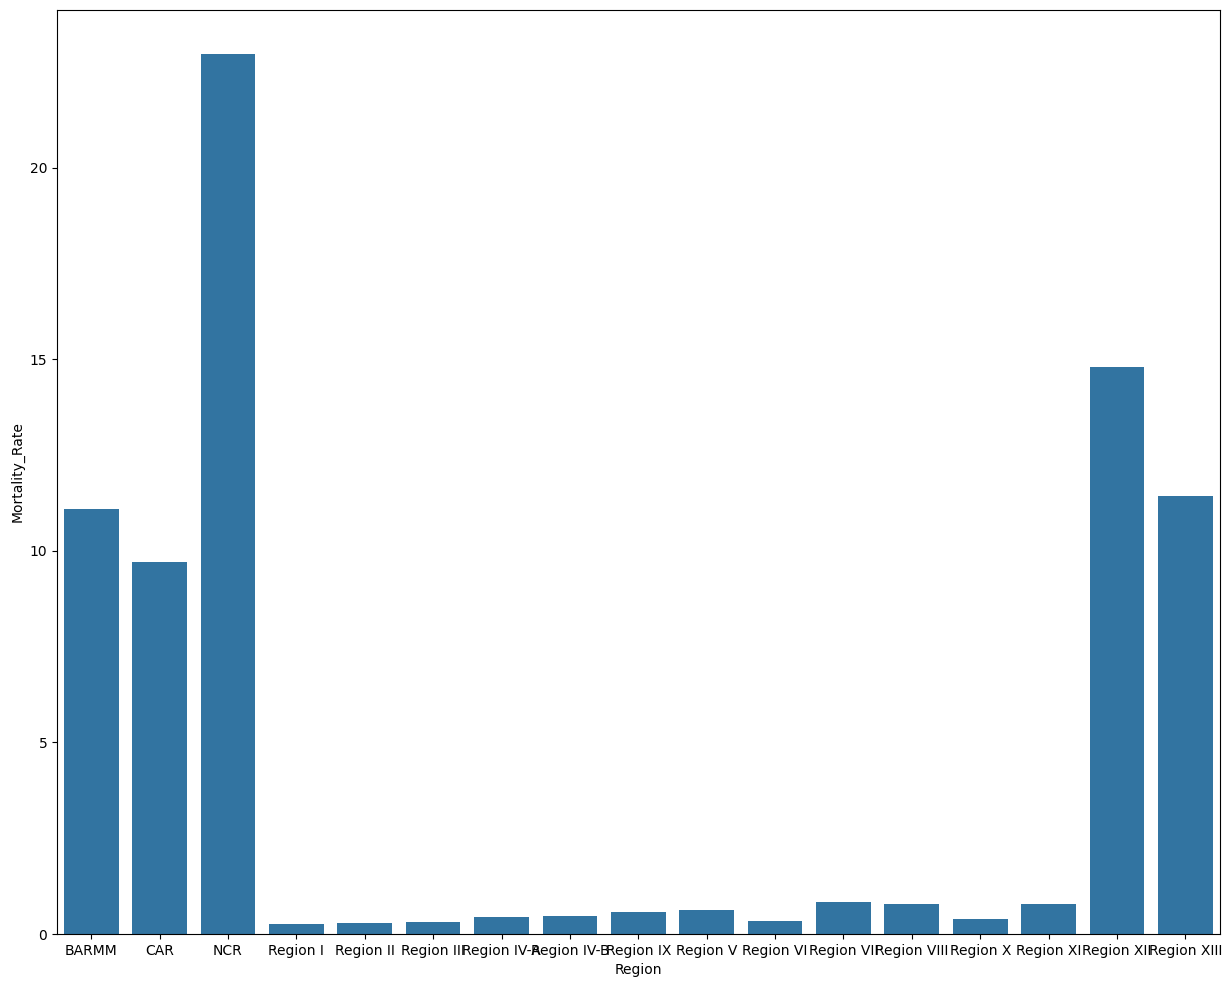

In [18]:
visual4 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(15,12)
plt.show()

<H1>Insight #8</H1>
<h2>In 2016, the National Capital Region (NCR) had the highest share of reported mortalities in the Philippines, accounting for 22.97% of the total, followed by Region XII (14.79%) and Region XIII (11.42%), highlighting significant regional disparities. In contrast, regions like Region I (0.25%), Region II (0.28%), and Region III (0.31%) reported much lower mortality rates, suggesting better health outcomes or underreporting. These disparities emphasize the need for more equitable healthcare access and targeted public health investments in regions with higher mortality rates.</h2>

<h1>Year 2019</h1>

In [19]:
year2k19 = dengue[dengue["Year"] == 2019]

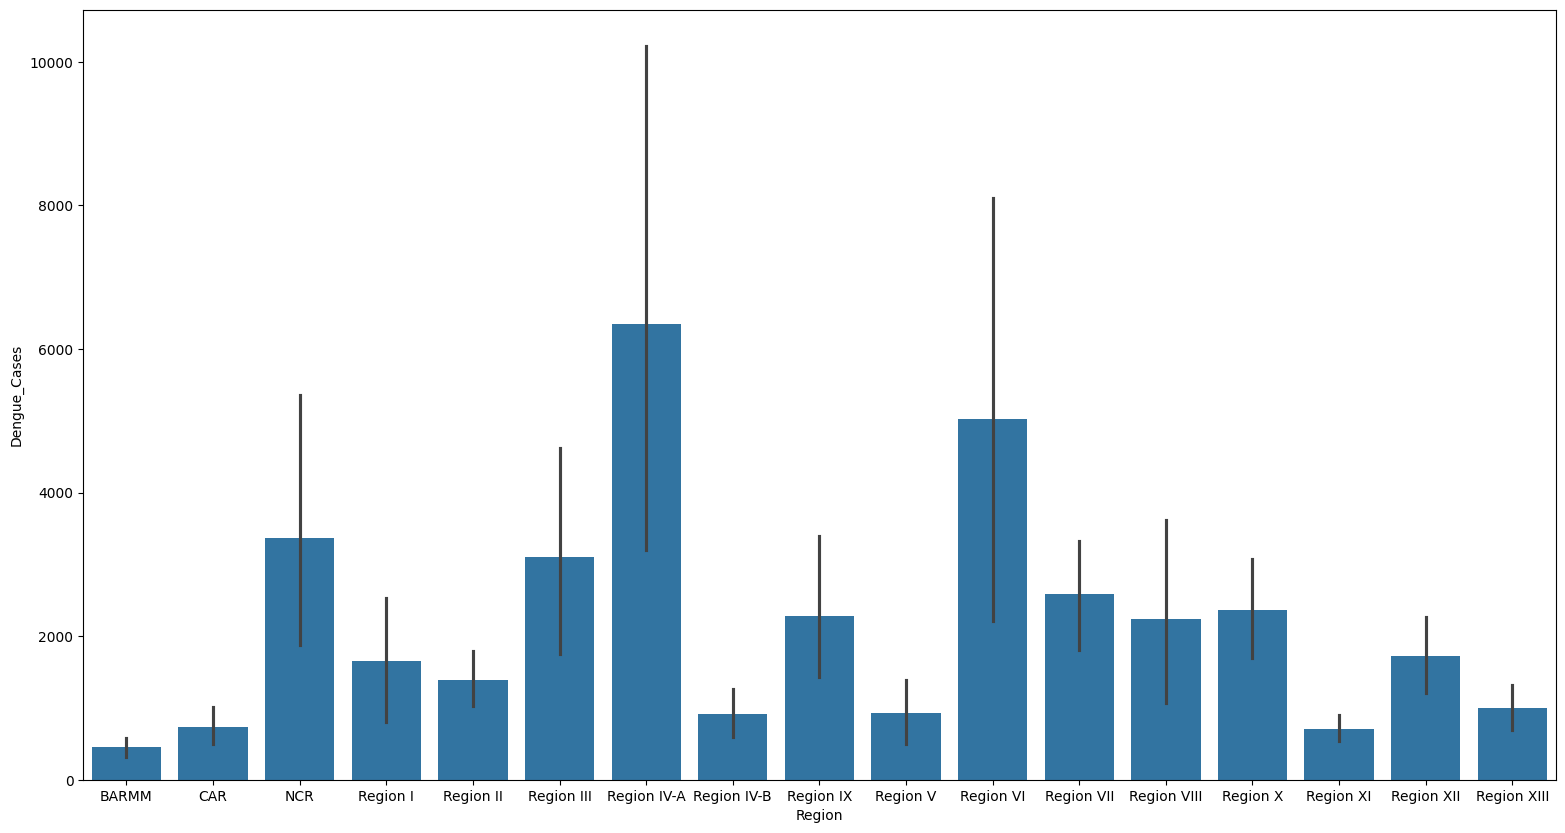

In [20]:
visual5 = sns.barplot(data=year2k19, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<H1>Insight #9</H1>
<h2>Region IV-A was recorded as the most number of Dengue Cases during 2019 that is followed by Region VI</h2>

In [21]:
Region4A_19 = year2k19[year2k19["Region"] == "Region IV-A" ]

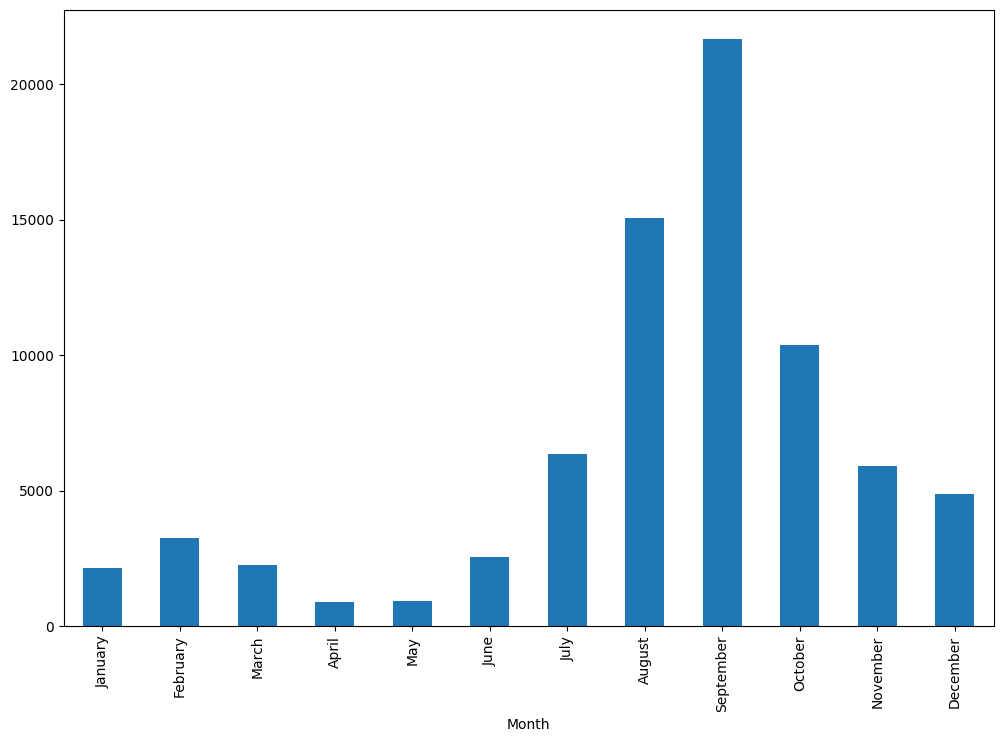

In [22]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Region4A_19['Month'] = pd.Categorical(Region4A_19['Month'], categories=month_order, ordered=True)

RegionfourA = Region4A_19.groupby([Region4A_19.Month])["Dengue_Cases"].sum()
RegionfourA.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1>Insight #10</h1>
<h2>In 2019, the number of dengue cases in Region 4A varied significantly across the months. The highest incidence occurred in September, accounting for 28.8% of the total cases, while the lowest was in April, with just 3.7%. The peak in August (18.3%) and October (14.3%) also contributed to a significant share of the cases, reflecting a sharp increase in infections during the latter part of the year.</h2>

In [23]:
Regional_Death19 = year2k19.groupby("Region")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [24]:
Regional_Death19["Mortality_Rate"] = np.round((Regional_Death19["Dengue_Deaths"] / Regional_Death19["Dengue_Cases"]) * 100,2)

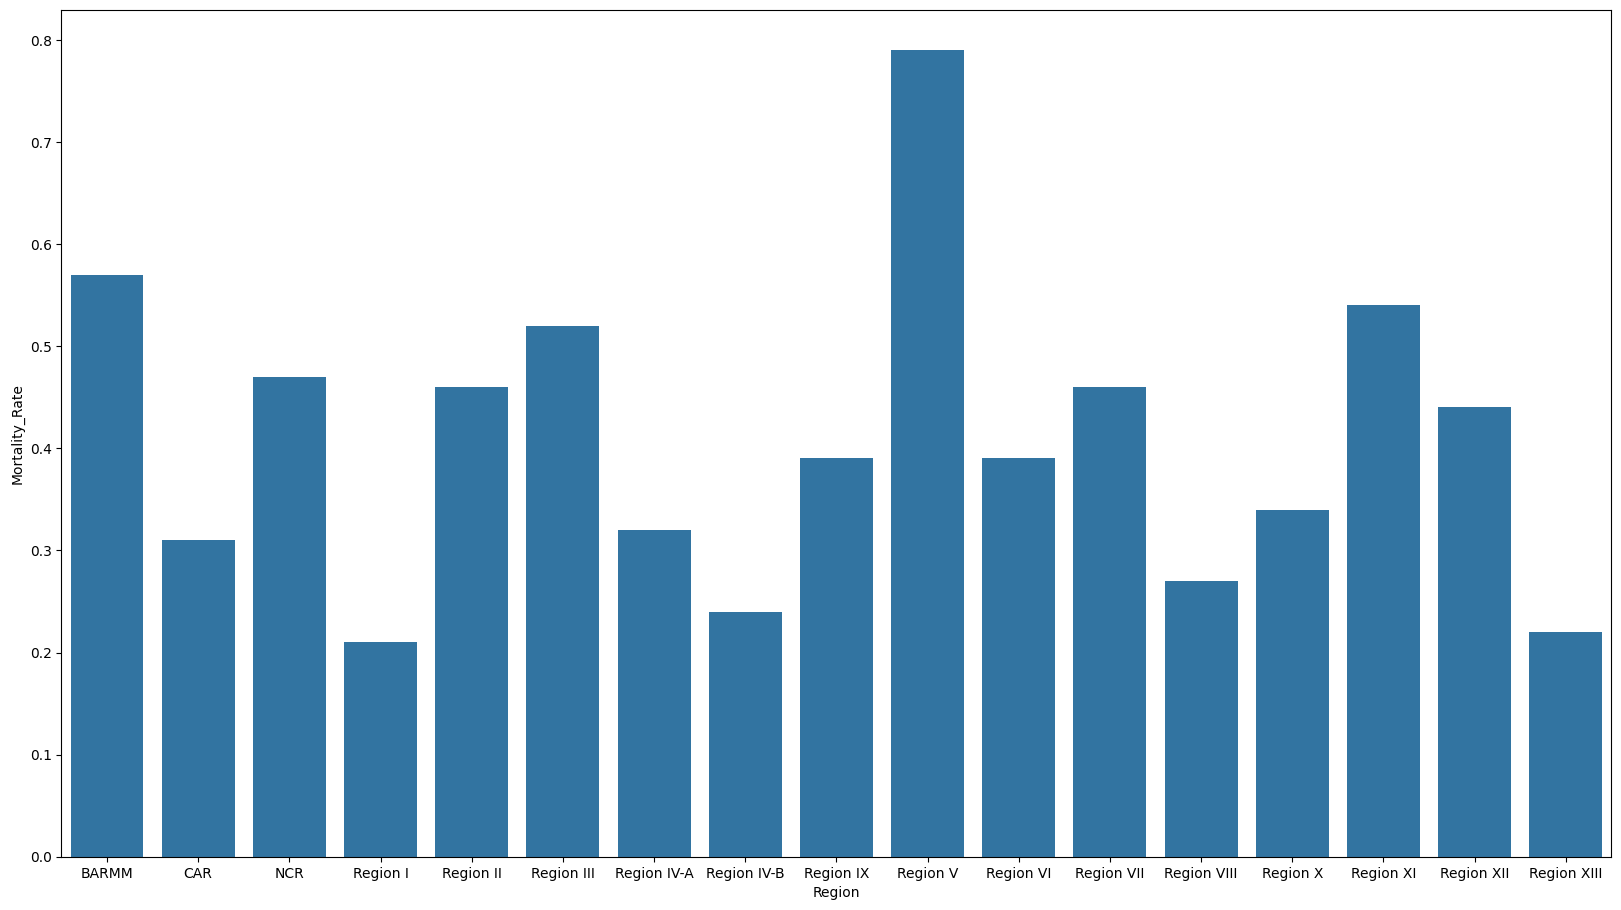

In [25]:
visual6 = sns.barplot(data=Regional_Death19, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

In [26]:
Regional_Death19["Mortality_Rate"]

Region
BARMM          0.57
CAR            0.31
NCR            0.47
Region I       0.21
Region II      0.46
Region III     0.52
Region IV-A    0.32
Region IV-B    0.24
Region IX      0.39
Region V       0.79
Region VI      0.39
Region VII     0.46
Region VIII    0.27
Region X       0.34
Region XI      0.54
Region XII     0.44
Region XIII    0.22
Name: Mortality_Rate, dtype: float64

<h1>Insight #11</h1>
<h2>In 2019, Region V had the highest dengue mortality rate at 0.79, representing a significant proportion of deaths. In comparison, Region XIII had the lowest rate at 0.22, while Region IV-A had a moderate rate of 0.32. Other regions like NCR (0.47) and Region III (0.52) also showed higher mortality rates, suggesting varied regional impacts of the disease.</h2>

In [27]:
Region5_Death = year2k19.groupby("Month")[["Dengue_Deaths"]].sum()

In [28]:
Region5_Death

,Dengue_Deaths
Month,
January,94
February,101
March,103
April,59
May,56
June,119
July,232
August,280
September,377


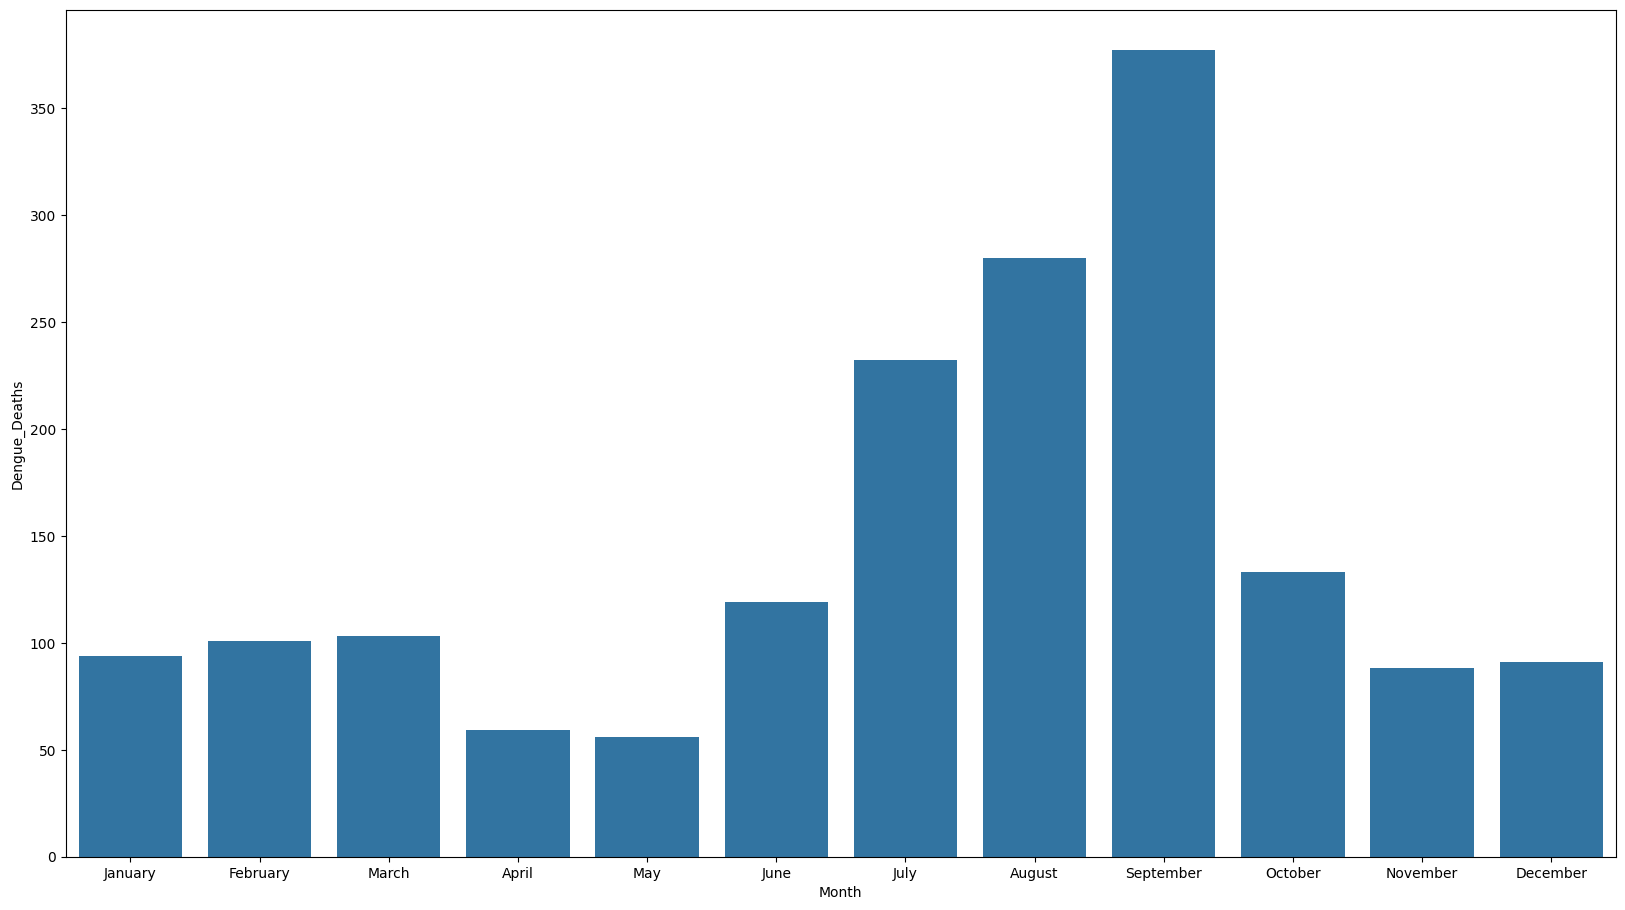

In [29]:
visual7 = sns.barplot(data=Region5_Death, x="Month",y="Dengue_Deaths")
plt.gcf().set_size_inches(20,11)
plt.show()

<H1>Insight #12</H1>
<h2>In 2019, the highest number of dengue-related deaths occurred in September, accounting for 19.4% of the total deaths, while the lowest was in May with just 4.4%. August (13.2%) and July (12.7%) also saw significant fatality rates. This indicates a peak in mortality during the latter half of the year, especially from June to September.</h2>

<H1>Correlation</H1>

In [37]:
corr2k19 = year2k19['Dengue_Deaths'].corr(year2k19['Dengue_Cases'])

In [38]:
corr2k19

np.float64(0.7766908407543017)

<h1>Insight #13</h1>
<H2>In 2019, there was a strong positive correlation (r ≈ 0.78) between dengue cases and dengue-related deaths. This suggests that as the number of reported dengue cases increased, the number of deaths also tended to rise, highlighting the significant health impact of dengue outbreaks during that year.</H2>

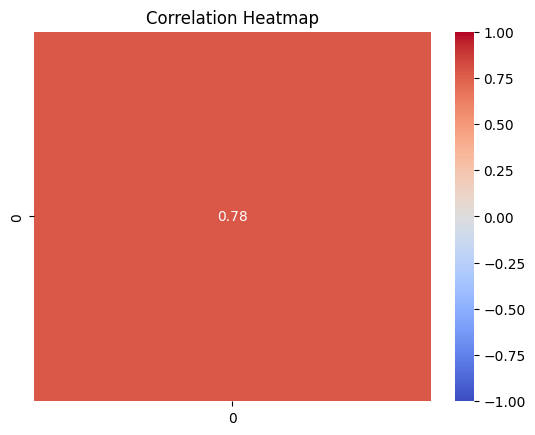

In [43]:
sns.heatmap([[corr2k19]], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [39]:
corr2k16 = year2k16['Dengue_Deaths'].corr(year2k16['Dengue_Cases'])

In [40]:
corr2k16

np.float64(0.0037098218809707728)

<h1>Insight #14</h1>
<H2>In 2016, the correlation between dengue cases and dengue-related deaths was extremely weak (r ≈ 0.004), indicating almost no linear relationship between the two variables. This suggests that fluctuations in the number of dengue cases that year did not significantly affect the number of deaths, possibly due to effective medical interventions or other mitigating factors.</H2>

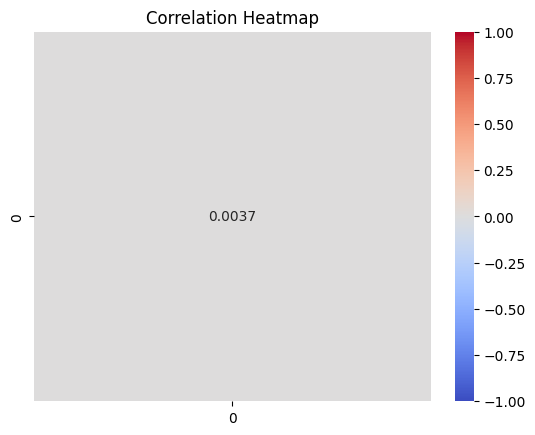

In [44]:
sns.heatmap([[corr2k16]], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [47]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


In [48]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1
